In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from seaborn import pairplot
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from IPython.display import Image

# <center> Validação </center>

## <center> Critérios de validação </center> 

De acordo com Faceli et al. (2019), o critério de validação expressa a estratégia utilizada para validar um agrupamento, enquanto o índice é uma estatística pela qual a validade é testada. O críterio de validação indica a maneira pela qual um índice é aplicado para validar um agrupamento.

Podemos subdividir os critérios de validação em:

<ul>
    <li> Critérios relativos - dado um conjunto de agrupamentos, procura-se encontrar por comparação um agrupamento que melhor se ajuste aos dados sob certa suposição. </li>
    <li> Critérios internos - </li>
    <li> Critérios externos - O objetivo da validação externa é quantificar o quanto o agrupamento obtido confirma uma hipótese pré-definida.</li>
</ul>

## Critérios de validação relativa

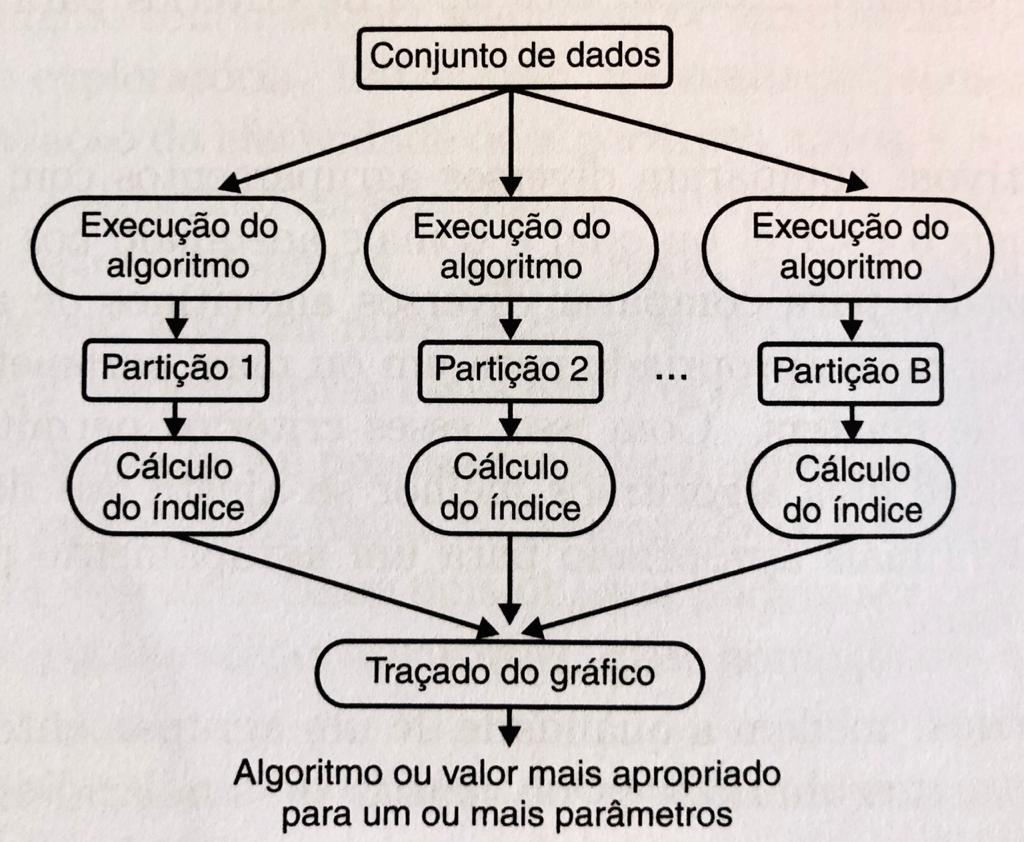

In [2]:
#Imagem do livro Inteligência Artificial - Uma abordagem de Aprendizado de Máquina (Faceli et al., 2019)
Image('validacao-relativa.jpeg',width=400,height=400)

## <center> Variância Intracluster </center>

$$Var = \frac{1}{N} \sum_{\underset{\mathbf{x_n} \in C_K}{n=1}}^{N_k}\sum_{k=1}^{K}\left \| \mathbf{x_n} -\boldsymbol{\mu}_{k} \right \|^2 $$

In [3]:
def centroides_update(X,labels,K):
    X,labels = np.asarray(X), np.asarray(labels)
    centroides = np.zeros(shape=(K,X.shape[1]))
    for k in range(0,K):
        centroides[k] = np.mean(X[labels==k],axis=0)
    return centroides

In [4]:
def variancia_intra_cluster(X,labels,centroides):
    X,labels = np.asarray(X), np.asarray(labels)
    variancia = 0.0
    for k in np.unique(labels):
        variancia+=np.sum((X[labels==k]-centroides[k])**2)
    return variancia/X.shape[0]

#### Carregando o dataset

In [5]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
#Normalizando os dados
scaler = StandardScaler()
X = scaler.fit_transform(df[df.columns[:4]])
X.shape

(150, 4)

In [7]:
var_score = []
km_obj = []
for k in range(2,11):
    km = KMeans(n_clusters=k)
    km.fit(X)
    var_score.append(variancia_intra_cluster(X,km.labels_,centroides_update(X,km.labels_,k)))
    km_obj.append(km)

In [8]:
var_score

[1.482411366433487,
 0.9321366423983322,
 0.762032022123784,
 0.6069844660739686,
 0.533579165353101,
 0.4736520659262327,
 0.4167359941780151,
 0.370536618521395,
 0.3151189656799237]

Text(0.5, 0, 'Número de clusters')

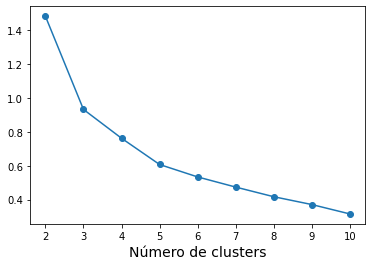

In [9]:
plt.plot(np.arange(2,11),var_score,marker='o')
plt.xlabel('Número de clusters',fontsize=14)

### Técnica do cotovelo (elbow method)

In [10]:
#var[i+1] - var[i]
np.asarray(var_score[:-1])-np.asarray(var_score[1:])

array([0.55027472, 0.17010462, 0.15504756, 0.0734053 , 0.0599271 ,
       0.05691607, 0.04619938, 0.05541765])

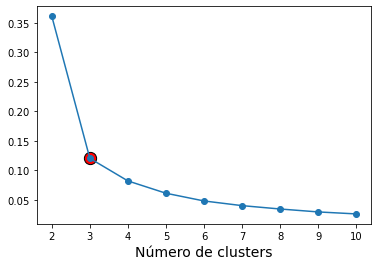

In [17]:
plt.plot(np.arange(2,11),var_score,marker='o')
plt.scatter(x=3,y=var_score[1],c='red',s=150,edgecolor='black')
plt.xlabel('Número de clusters',fontsize=14)
plt.show()

#### Análise de agrupamento com duas variáveis

In [12]:
data = pd.DataFrame(X[:,[2,3]],columns=['x1','x2'])
data['target'] = iris.target
data.head()

,x1,x2,target
0,-1.340227,-1.315444,0
1,-1.340227,-1.315444,0
2,-1.397064,-1.315444,0
3,-1.283389,-1.315444,0
4,-1.340227,-1.315444,0


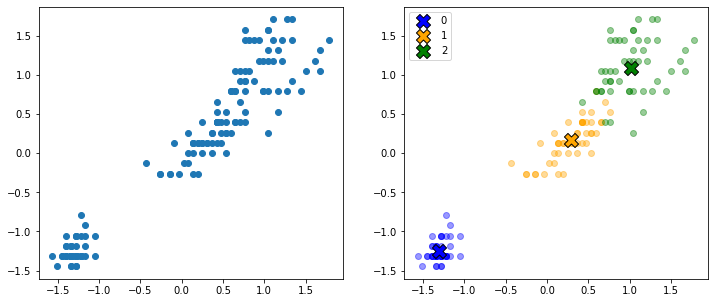

In [14]:
fig,axes = plt.subplots(ncols=2,figsize=(12,5))

axes[0].scatter(data.x1,data.x2)
color=['blue','orange','green']
for i in range(0,3):
    axes[1].scatter(data[data.target==i].x1,data[data.target==i].x2,
                    c=color[i],alpha=0.4)
    axes[1].scatter(data[data.target==i].x1.mean(),data[data.target==i].x2.mean(),
                    c=color[i],edgecolor='black',marker='X',s=200,label=str(i))
axes[1].legend()

In [15]:
var_score = []
km_obj = []
for k in range(2,11):
    km = KMeans(n_clusters=k)
    km.fit(data[['x1','x2']])
    var_score.append(variancia_intra_cluster(data[['x1','x2']],km.labels_,
                                             centroides_update(data[['x1','x2']],km.labels_,k)))
    km_obj.append(km)

Text(0.5, 0, 'Número de clusters')

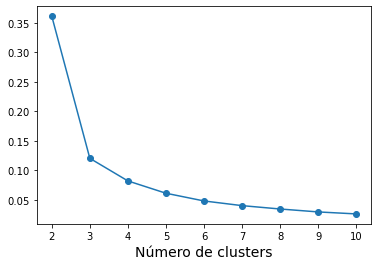

In [16]:
plt.plot(np.arange(2,11),var_score,marker='o')
plt.xlabel('Número de clusters',fontsize=14)

In [18]:
#var[i+1] - var[i]
np.asarray(var_score[:-1])-np.asarray(var_score[1:])

array([0.24094546, 0.0382906 , 0.02087492, 0.01309687, 0.00792682,
       0.0057069 , 0.00496181, 0.00338097])

## <center><a href="https://www.sciencedirect.com/science/article/pii/0377042787901257">Índice de Silhueta </a> </center>

O índice silhueta é designado para verificar a qualidade das partições obtidas sem levar em consideração informações externas, comumente utilizada para verificar o número apropriado de grupos;

O coeficiente silhueta é obtido da seguinte forma:

$$ s(x_i) = \frac{b(x_i)-a(x_i,C_k)}{\max{ \{ a(x_i,C_k),b(x_i)\} }} $$

onde

$a(x_i,C_i)$ calcula a distância média intra-cluster entre o objeto $x_i$ e todos os elementos pertencentes ao mesmo cluster $C_k$:

$$ a(x_i,C_k) = \frac{1}{N_k} \sum_{x_i,x_j \in x_i \not\equiv  x_j} d(x_i,x_j),$$ 

$b(x_i)$ calcula a menor distância entre $x_i$ e todos os outros grupos:

$$ b(x_i) = \underset{\forall C_k,x_i \not\in C_k  }{min} a(x_i,C_k) $$

$s(x_i)$ pode ser escrito como:

$$s(i) = \left\{\begin{matrix}
1-\frac{a(i)}{b(i)} \;\;\;\;\; \text{se} \; a(i)<b(i)\\ 
0 \;\;\;\;\;\;\;\;\;\;\;\;\;\; \text{se} \; a(i)=b(i)\\ 
\frac{a(i)}{b(i)}-1 \;\;\;\;\; \text{se} \; a(i)>b(i)
\end{matrix}\right.$$

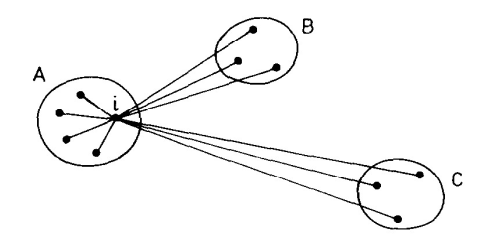

In [21]:
#Imagem do livro Inteligência Artificial - Uma abordagem de Aprendizado de Máquina (Faceli et al., 2019)
Image('silhueta.png',width=500,height=500)

In [22]:
def euclidean_distance(u,v):
    u,v = np.asarray(u),np.asarray(v)
    return np.sqrt(np.sum((u-v)**2,axis=1))

In [23]:
def silhueta_score_mean(X,y):
    X,y = np.asarray(X),np.asarray(y)
    a = np.zeros(X.shape[0])
    sil = np.zeros(X.shape[0])
    b = np.zeros(shape=(X.shape[0],len(np.unique(y))-1))

    for i in range(0,len(X)):
        index = np.arange(0,len(X))
        index = index[y==y[i]]
        index = index[index !=i]
        a[i] = np.mean(euclidean_distance(X[i],X[index]))

        aux=0
        for j in np.unique(y)[np.unique(y) != y[i]]:
            index = np.arange(0,len(X))
            index = index[y==j]
            b[i][aux] = np.mean(euclidean_distance(X[i],X[index]))
            aux+=1
    b=np.min(b,axis=1)
    
    sil = (b-a)/np.max((a,b),axis=0)
    
#     for i in range(0,len(X)):
#         if a[i]>b[i]:
#             sil[i] = 1-(b[i]/a[i])
#         elif a[i]==b[i]:
#             sil[i]=0
#         else:
#             sil[i]=(a[i]/b[i])-1

    return a,b,sil

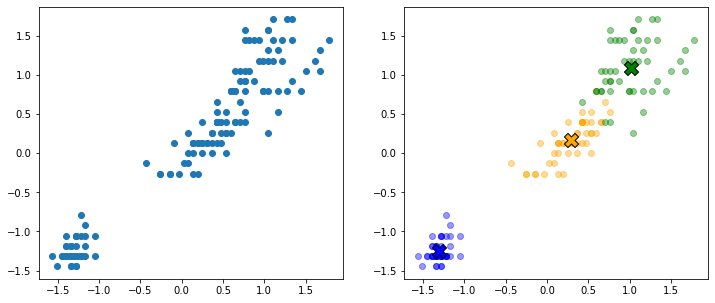

In [24]:
fig,axes = plt.subplots(ncols=2,figsize=(12,5))

axes[0].scatter(data.x1,data.x2)
color=['blue','orange','green']
for i in range(0,3):
    axes[1].scatter(data[data.target==i].x1,data[data.target==i].x2,
                    c=color[i],alpha=0.4)
    axes[1].scatter(data[data.target==i].x1.mean(),data[data.target==i].x2.mean(),
                    c=color[i],edgecolor='black',marker='X',s=200)

In [25]:
a,b,sil = silhueta_score_mean(data[['x1','x2']],data.target)

In [28]:
sil[50:100]

array([ 0.61437821,  0.60694818,  0.41824785,  0.7332562 ,  0.57399372,
        0.70354494,  0.3793739 ,  0.49673827,  0.67598884,  0.68296026,
        0.57461827,  0.63317334,  0.67024199,  0.61437821,  0.66648105,
        0.69665391,  0.60694818,  0.6678959 ,  0.60694818,  0.70181665,
       -0.15905013,  0.7332562 ,  0.41824785,  0.6369193 ,  0.73694573,
        0.69665391,  0.56689599, -0.07042987,  0.60694818,  0.57461827,
        0.69418226,  0.63375318,  0.72126842,  0.09567692,  0.60694818,
        0.46455002,  0.53104924,  0.72367551,  0.74087198,  0.7332562 ,
        0.71076862,  0.65076124,  0.7298516 ,  0.49673827,  0.74235159,
        0.73163303,  0.74235159,  0.73694573,  0.42773437,  0.74087198])

In [29]:
np.mean(sil)

0.6500205654536849

In [31]:
np.argmin(sil)

119

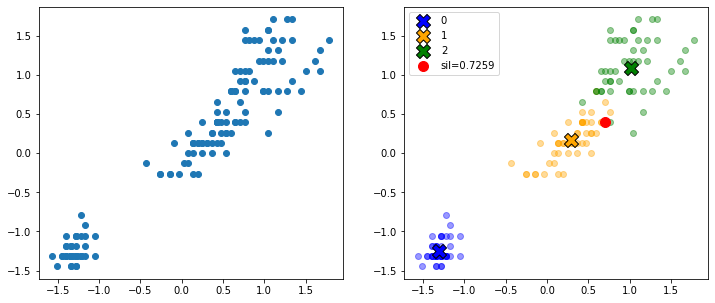

In [32]:
fig,axes = plt.subplots(ncols=2,figsize=(12,5))

axes[0].scatter(data.x1,data.x2)
color=['blue','orange','green']
for i in range(0,3):
    axes[1].scatter(data[data.target==i].x1,data[data.target==i].x2,
                    c=color[i],alpha=0.4)
    axes[1].scatter(data[data.target==i].x1.mean(),data[data.target==i].x2.mean(),
                    c=color[i],edgecolor='black',marker='X',s=200,label=i)

axes[1].scatter(data.x1[119],data.x2[119],c='red',s=100,label='sil='+str(round(sil[43],4)))
    
axes[1].legend()

### Selecionando o número de clusters baseados no index silhueta

In [33]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [34]:
sil_score = []
km_obj = []
for k in range(2,11):
    km = KMeans(n_clusters=k)
    km.fit(data[['x1','x2']])
    sil_score.append(silhouette_score(data[['x1','x2']],km.labels_))
    km_obj.append(km)

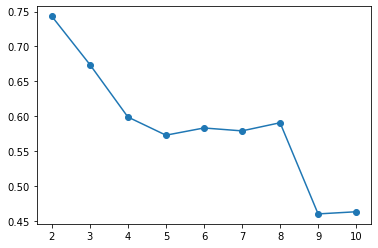

In [35]:
plt.plot(np.arange(2,11),sil_score,marker='o')